In [5]:
import numpy as np
import pandas as pd

**Importing the dataset**

In [6]:
df = pd.read_csv('Position_Salaries.csv')
df.head()

,Position,Level,Salary
0,Business Analyst,1,45000
1,Junior Consultant,2,50000
2,Senior Consultant,3,60000
3,Manager,4,80000
4,Country Manager,5,110000


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Position  10 non-null     object
 1   Level     10 non-null     int64 
 2   Salary    10 non-null     int64 
dtypes: int64(2), object(1)
memory usage: 368.0+ bytes


**Separating Independent and Dependent Variable**

In [8]:
x = df[['Level']]
y = df['Salary']

Simple Linear Regression Model

In [9]:
from sklearn.linear_model import LinearRegression
lm = LinearRegression()
lm.fit(x,y)

LinearRegression()

In [10]:
y_linear = lm.predict(x)

**Training the Polynomial Regression model on the whole dataset**

In [12]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

poly_feat = PolynomialFeatures(degree=3)
x_poly = poly_feat.fit_transform(x)

plm = LinearRegression()
plm.fit(x_poly, y)

LinearRegression()

In [13]:
print("Slope: ", plm.coef_)
print("Intercept: ", plm.intercept_)

Slope:  [     0.         180664.33566432 -48548.95104895   4120.04662005]
Intercept:  -121333.33333331178


**Prediction**

In [14]:
y_pred = plm.predict(poly_feat.fit_transform(x))

In [15]:
plm.predict(poly_feat.fit_transform([[6.5]]))

array([133259.46969697])

**Comparing target with Predicted**

In [28]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

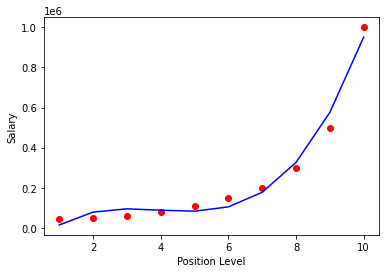

In [17]:
plt.scatter(x,y, color='r')
plt.plot(x, y_pred, color='b')
plt.xlabel('Position Level')
plt.ylabel('Salary');

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


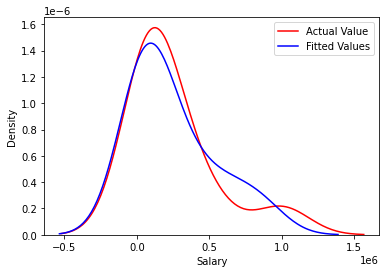

In [29]:
ax1 = sns.distplot(y, hist=False, color='r', label='Actual Value');
sns.distplot(y_pred, hist=False, color='b', label='Fitted Values', ax=ax1);
plt.legend();